<a href="https://colab.research.google.com/github/Rochi2101/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Física", "Química", "Biología", "Educación Física", "Inglés", "Ciudadanía", "Arte", "Música", "Informática"]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Sofia", "Lucas", "Martina", "Benjamin", "Emma", "Thiago"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Gonzalez", "Martinez", "Sanchez", "Romero", "Fernandez", "Torres"]
  return f"{random.choice(nombres)} {random.choice(apellidos)}"


# Crear un DataFrame vacío
df = pd.DataFrame(columns=["Apellido y Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Generar 100 filas de datos aleatorios
for i in range(100):
  nombre = generar_nombre()
  dni = random.randint(10000000, 99999999) # DNI aleatorio
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)

  nueva_fila = pd.DataFrame({
      "Apellido y Nombre": [nombre],
      "Nro_DNI": [dni],
      "Materia Escolar": [materia],
      "Nota 1er Trimestre": [nota1],
      "Nota 2do Trimestre": [nota2],
      "Nota 3er Trimestre": [nota3],
      "Faltas a clases": [faltas]
  })

  df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar el DataFrame
df

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Martina Gonzalez,70310384,Lengua y Literatura,1,4,3,10
1,Ana Fernandez,20869278,Física,5,2,7,14
2,Thiago Fernandez,55031845,Música,1,10,7,14
3,Thiago Gonzalez,75512797,Biología,4,3,4,6
4,Pedro Torres,97715146,Educación Física,1,6,1,0
...,...,...,...,...,...,...,...
95,Maria Rodriguez,49137210,Matemática,7,7,7,14
96,Pedro Lopez,71005935,Arte,2,6,7,16
97,Benjamin Torres,84096107,Ciudadanía,3,1,1,8
98,Benjamin Gonzalez,64443421,Arte,3,2,10,2


In [4]:
# prompt: Con DataFrame df: df.to_csv("datos_alumnos.csv", index=False)

# Save the DataFrame to a CSV file named 'datos_alumnos.csv' without the index.
df.to_csv("datos_alumnos.csv", index=False)


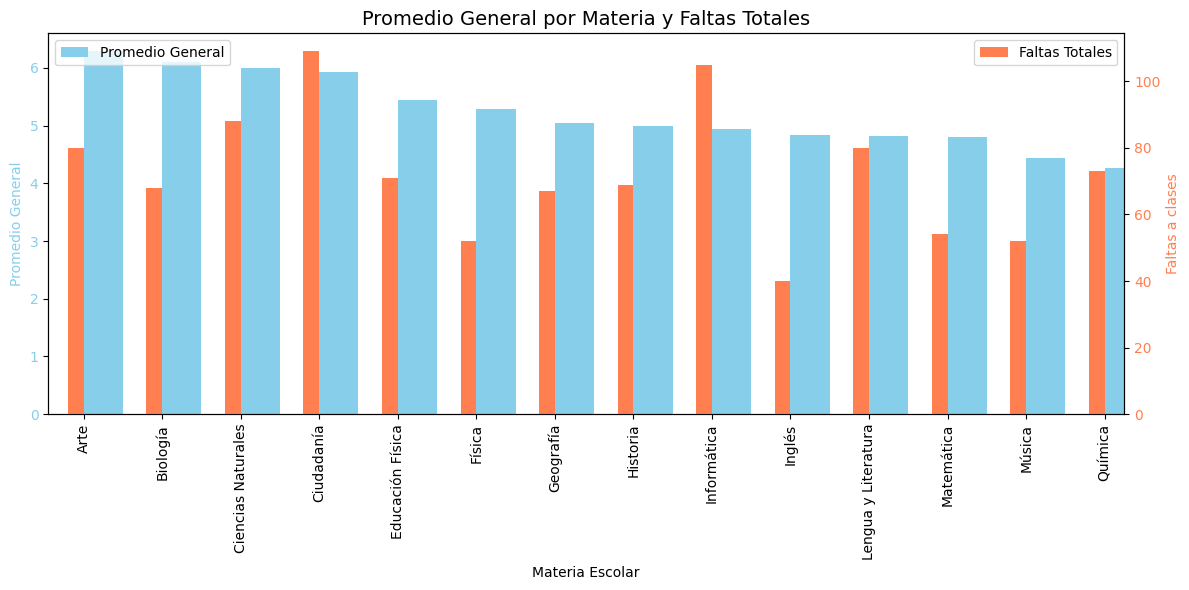

In [2]:
# prompt: Con DataFrame df: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contratable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
df['Promedio General'] = (df['Nota 1er Trimestre'] + df['Nota 2do Trimestre'] + df['Nota 3er Trimestre']) / 3
average_grades = df.groupby('Materia Escolar')['Promedio General'].mean().sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()


# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', ax=ax1, color='skyblue', position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()

# Plot total absences
width = 0.2
total_absences.plot(kind='bar', ax=ax2, color='coral', position=1, width=width)
ax2.set_ylabel('Faltas a clases', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')


# Customize the chart
plt.title('Promedio General por Materia y Faltas Totales', fontsize=14)
plt.xlabel('Materia Escolar', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add a legend
ax1.legend(['Promedio General'], loc='upper left')
ax2.legend(['Faltas Totales'], loc='upper right')


plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()